# Gaussian distribution

### Description
The datasets contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Download the dataset
https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv


## Imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
from sklearn import metrics
import numpy as np
from matplotlib.colors import LogNorm
from sklearn.metrics import f1_score

In [4]:
df = pd.read_csv("datasets/creditcard.csv")

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
print("Number of features:", len(df.columns))
print("Dataset length:", len(df))

Number of features: 31
Dataset length: 284807


In [7]:
# 492 fraudulent transactions, 284315 legitim transactions
# The dataset is not balanced!!
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:

df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


C:\Users\Ihona\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ihona\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ihona\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

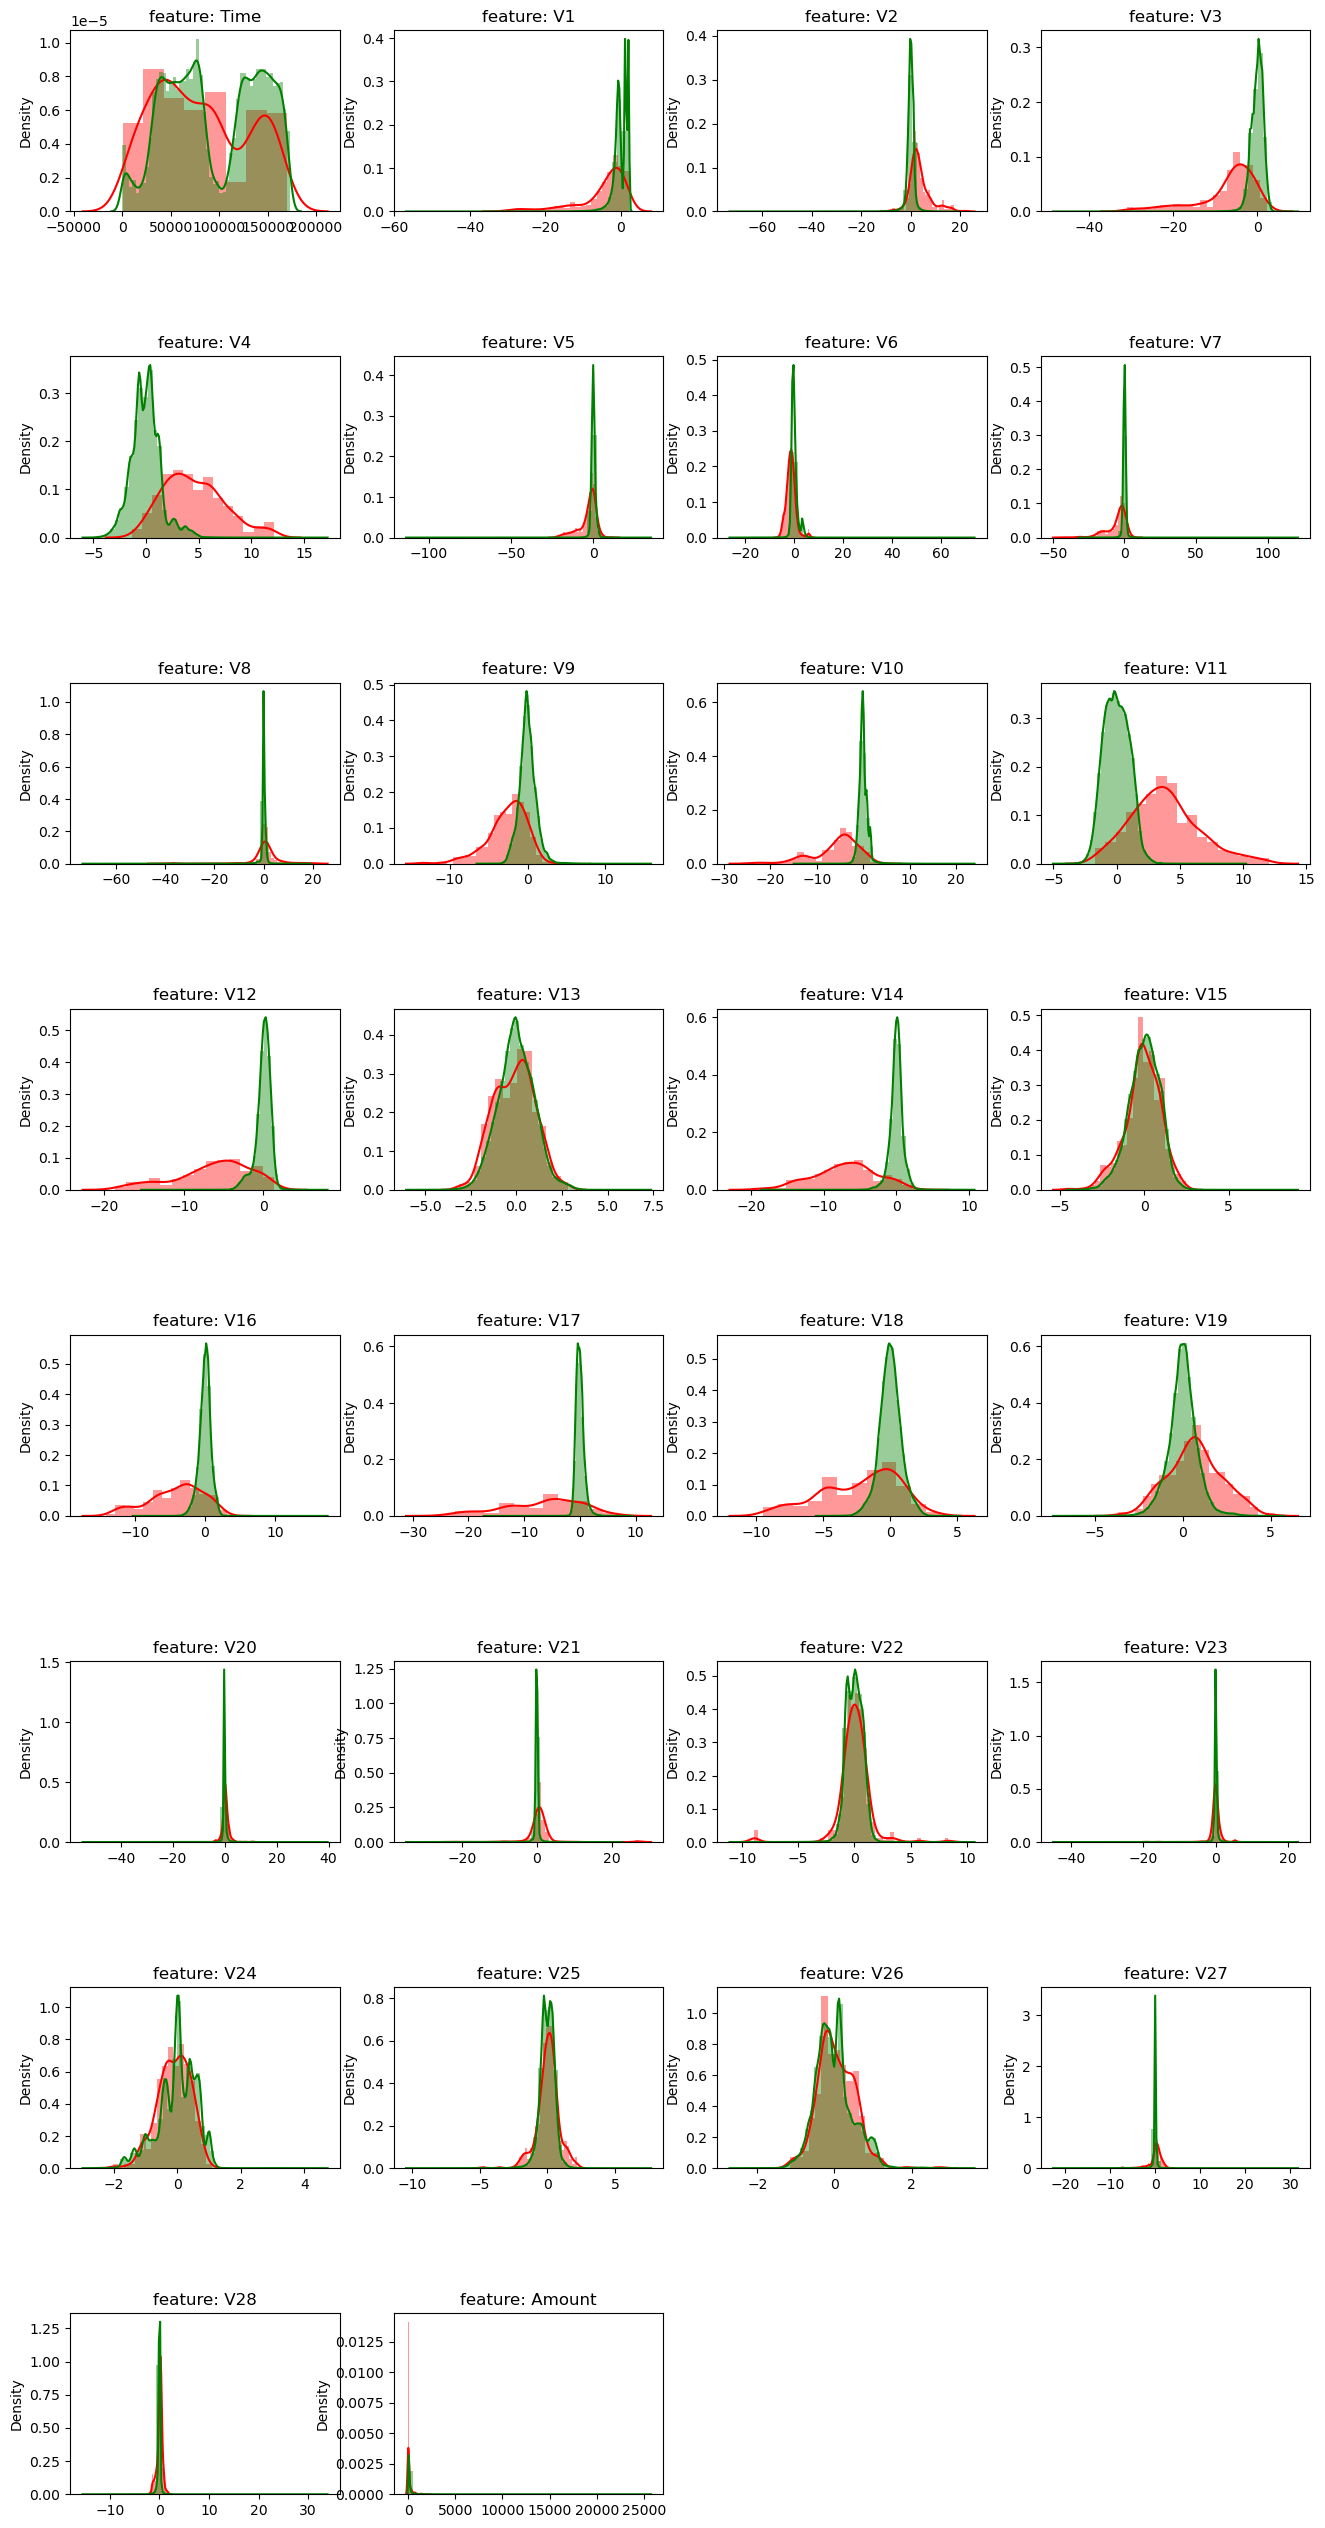

In [11]:
# We represent the features graphically.
features = df.drop("Class", axis=1)

plt.figure(figsize=(16,32))
gs = gridspec.GridSpec(8, 4)
gs.update(hspace=0.8)

for i, f in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[f][df["Class"] == 1], color='r')
    sns.distplot(df[f][df["Class"] == 0], color='g')
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(f))

plt.show()

#We observe the fraudulent transactions in red and the legitim transactions in green. The proper features that will help
#us identify a future fraudulent transaction are the ones that don't overlap too much, since they are easy to distinguish. 

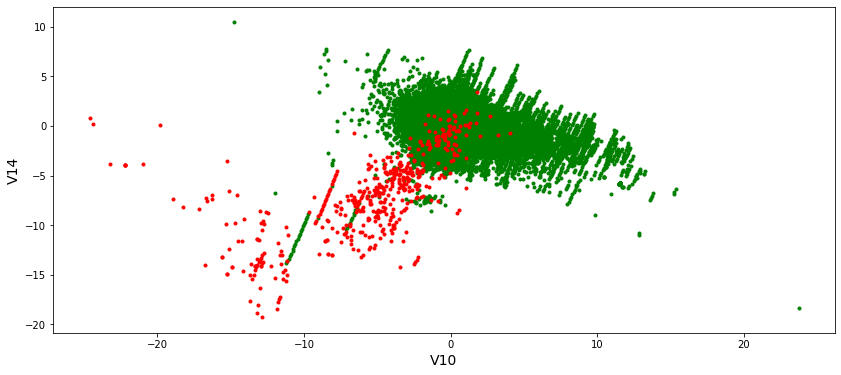

In [10]:
plt.figure(figsize=(14, 6))
plt.scatter(df["V10"][df['Class'] == 0], df["V14"][df['Class'] == 0], c="g", marker=".")
plt.scatter(df["V10"][df['Class'] == 1], df["V14"][df['Class'] == 1], c="r", marker=".")
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

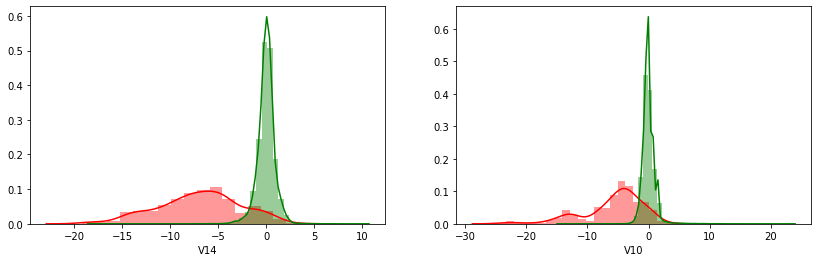

In [11]:
plt.figure(figsize=(14,4))
gs = gridspec.GridSpec(1, 2)
# Feature 1
ax = plt.subplot(gs[0])
sns.distplot(df["V14"][df['Class'] == 1], color='r')
sns.distplot(df["V14"][df['Class'] == 0], color='g')
# Feature 2
ax = plt.subplot(gs[1])
sns.distplot(df["V10"][df['Class'] == 1], color='r')
sns.distplot(df["V10"][df['Class'] == 0], color='g')
plt.show()

## Preparation of the dataset

In order to apply the algorithm, the data must be in a similar range, so we should scale or normalize the dataset. 

In [13]:
df_prep = df.drop(["Time", "Amount"], axis=1)

## 2D Gaussian Distribution

In [14]:
X = df_prep.drop("Class", axis=1)
y = df_prep["Class"].copy()

In [15]:
X_reduced = X[["V10", "V14"]].copy()

**Algorithm training with a reduced dataset**

In [16]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=42)
gm.fit(X_reduced)

GaussianMixture(n_components=2, random_state=42)

**Decision boundary representation**

In [17]:
def plot_gaussian_mixture(clusterer, X, y, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

C:\Users\Ihona\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Ihona\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


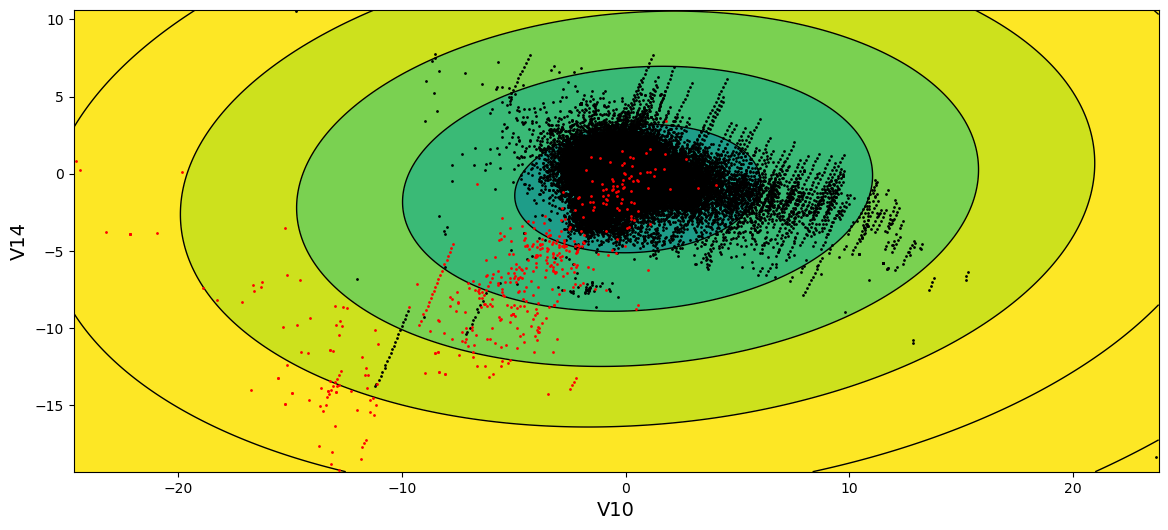

In [18]:
plt.figure(figsize=(14, 6))
plot_gaussian_mixture(gm, X_reduced.values, y)
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

**Anomaly representation**

To identify anomalies, a threshold must be selected from which all examples found in regions with a density lower than that indicated in the threshold are considered anomalies.

In [19]:
# Threshold selection
densities = gm.score_samples(X_reduced)
density_threshold = np.percentile(densities, 0.03)
print("Threshold seleccionado:", density_threshold)

Threshold seleccionado: -22.902638313195304


In [20]:
# Anomalies identification
anomalies = X_reduced.values[densities < density_threshold]

In the graph shown below, the anomalies identified for the training data set and the previously selected threshold value are highlighted in green.

C:\Users\Ihona\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\Ihona\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


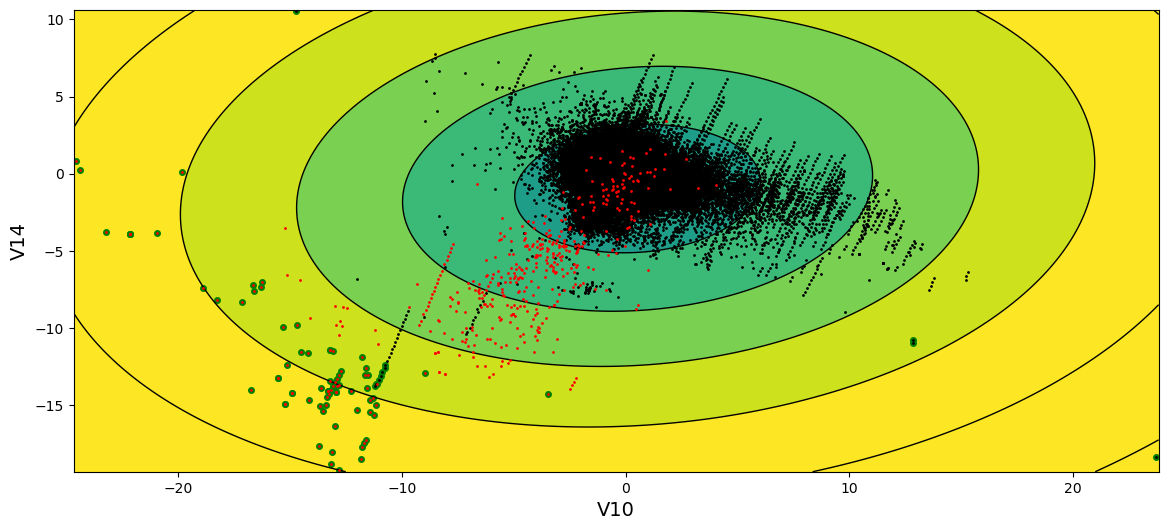

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(anomalies[:, 0], anomalies[:, 1], 'go', markersize=4)
plot_gaussian_mixture(gm, X_reduced.values, y)
plt.xlabel("V10", fontsize=14)
plt.ylabel("V14", fontsize=14)
plt.show()

**Prediction with the reduced dataset**

In [22]:

y_preds = (densities < density_threshold)
y_preds[y_preds == False] = 0
y_preds[y_preds == True] = 1

In [23]:

y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [24]:
# Indentified as anomalies : negatives (0) and positives (1)
y[y_preds==1].value_counts()

1    75
0    11
Name: Class, dtype: int64

## Gaussian distribution in a multidimensional dataset

In [25]:
# Model training
gm = GaussianMixture(n_components=2, random_state=42)
gm.fit(X)

GaussianMixture(n_components=2, random_state=42)

In [26]:
# Threshold selection
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 0.1)
print("Threshold seleccionado:", density_threshold)

Threshold seleccionado: -410.3849023507288


In [27]:

y_preds = (densities < -470)
y_preds[y_preds == False] = 0
y_preds[y_preds == True] = 1

In [28]:

y[y_preds==1].value_counts()

0    135
1    100
Name: Class, dtype: int64

## How to find the best threshold

In [31]:
from sklearn.base import BaseEstimator

class GaussianAnomalyDetector(BaseEstimator):
    def __init__(self, threshold=1):
        self._threshold = threshold
        self._gm = None
    def fit(self, X, y=None):
        self._gm = GaussianMixture(n_components=2, n_init=10, random_state=42)
        self._gm.fit(X) 
        return self
    
    def predict(self, X, y=None):
        densities = self._gm.score_samples(X)
        y_preds = (densities < self._threshold)
        y_preds[y_preds == False] = 0
        y_preds[y_preds == True] = 1
        return y_preds
    
    def get_params(self, deep=True):
        return {"threshold": self._threshold}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
            return self

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'threshold': randint(low=1, high=5),
    }

gad = GaussianAnomalyDetector()

# train across 3 folds, that's a total of 5*3=15 rounds of training
rnd_search = RandomizedSearchCV(gad, param_distributions=param_distribs,
                                n_iter=5, cv=3, scoring='f1')

rnd_search.fit(X, y)

In [30]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.005938965991800008 {'threshold': 3}
0.005938965991800008 {'threshold': 4}
0.005938965991800008 {'threshold': 1}
0.005938965991800008 {'threshold': 3}
0.005938965991800008 {'threshold': 4}


The way shown above is the most standard way to perform the search, but it is also the most inefficient. With the previous method it is required to train the model 15 times (with the indicated parameters).

With the form shown below, it is only necessary to train the model once.

In [ ]:
from sklearn.metrics import precision_score

def select_threshold(list_thds, densities, y):
    best_prec = 0
    best_threshold = 0
    i = 0
    for thd in list_thds:
        i += 1
        print("\rSearching best threshold {0}%".format(
            int((i + 1) / len(list_thds) * 100)), end='')
        preds = (densities < thd)
        preds[preds == False] = 0
        preds[preds == True] = 1
        precision = precision_score(y, preds)
        if precision > best_prec:
            best_prec = precision
            best_threshold = thd
    return (best_prec, best_threshold)

In [ ]:
select_threshold(np.arange(-600, -300, 1), densities, y)